In [10]:
import pandas as pd
import numpy as np

data=pd.read_csv("C:/Users/sharv/Documents/Post Graduate Program In Data Science-PurdueSimpliLearn/Course3-Machine Learning/Projects/Projects for Submission/Project 3 - Phishing Detector using LR/phishing.txt",names=[ 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ])

In [11]:
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [12]:
data.shape

(11055, 31)

In [13]:
data.isnull().sum()

UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
X= data.drop(columns='class')
Y=data['class']
Y=pd.DataFrame(Y)

In [17]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7738, 30)
(3317, 30)
(7738, 1)
(3317, 1)


# Lets apply Logistic Regression and check its accuracy

In [18]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logR=LogisticRegression()
model1=logR.fit(train_X,train_Y)
print(model1.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
logR_predict= model1.predict(test_X)
accuracy_score(logreg_predict,test_Y)

0.9240277359059391

In [21]:
print(classification_report(logR_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.91      0.92      0.91      1436
           1       0.94      0.93      0.93      1881

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(test_Y,logR_predict)
confusion_matrix

array([[1322,  138],
       [ 114, 1743]], dtype=int64)

“true positive” = 1322
“false positive”= 138
“true negative” = 1743
“false negative”= 114

# Lets apply K-Nearest Neighbors Classifier and check its accuracy

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
model2= knn.fit(train_X,train_Y)
print(model2.get_params())

C:\Users\sharv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [30]:
knn_predict=model2.predict(test_X)
accuracy_score(knn_predict,test_Y)

0.9463370515526078

In [31]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.93      0.94      0.94      1460
           1       0.96      0.95      0.95      1857

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,knn_predict))

[[1378   82]
 [  96 1761]]


“true positive” = 1378
“false positive”= 82
“true negative” = 1761
“false negative”= 96

# Lets apply Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
DecTree=DecisionTreeClassifier()
model3=DecTree.fit(train_X,train_Y)
print(model3.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [41]:
DecTree_predict=model3.predict(test_X)
accuracy_score(DecTree_predict,test_Y)

0.9686463671992764

In [42]:
print(classification_report(DecTree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1484
           1       0.97      0.98      0.97      1833

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,DecTree_predict))

[[1420   40]
 [  64 1793]]


“true positive” = 1420
“false positive”= 40
“true negative” = 1793
“false negative”= 64

# Lets apply Random Forest Classifier and check its accuracy

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model4=rfc.fit(train_X,train_Y)
print(model4.get_params())

C:\Users\sharv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [47]:
rfc_predict=model4.predict(test_X)
accuracy_score(rfc_predict,test_Y)

0.9716611395839614

In [48]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1448
           1       0.98      0.97      0.97      1869

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,rfc_predict))

[[1407   53]
 [  41 1816]]


“true positive” = 1407
“false positive”= 53
“true negative” = 1816
“false negative”= 41

# Lets Apply SVM and check its accuracy

In [50]:
from sklearn.svm import SVC
svc=SVC()
model5=svc.fit(train_X,train_Y)
print(model5.get_params())

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [51]:
svm_predict=model5.predict(test_X)
accuracy_score(svm_predict,test_Y)

0.9460355743141393

In [52]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1421
           1       0.96      0.94      0.95      1896

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,svm_predict))

[[1351  109]
 [  70 1787]]


“true positive” = 1351
“false positive”= 109
“true negative” = 1787
“false negative”= 70

# Lets apply AdaBoost Classifier and check its accuracy

In [54]:
from sklearn.ensemble import AdaBoostClassifier
ADB=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model6=ADB.fit(train_X,train_Y)
print(model6.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1, 'n_estimators': 5, 'random_state': None}


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [56]:
ADB_predict=model6.predict(test_X)
accuracy_score(ADB_predict,test_Y)

0.9095568284594513

In [58]:
print(classification_report(ADB_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90      1426
           1       0.93      0.91      0.92      1891

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,ADB_predict))

[[1293  167]
 [ 133 1724]]


“true positive” = 1293
“false positive”= 167
“true negative” = 1724
“false negative”= 133

# Lets apply XGBoost Classifier and check its accuracy

In [60]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
model7=xgb.fit(train_X,train_Y)
print(model7.get_params())

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [61]:
xgb_predict=model7.predict(test_X)
accuracy_score(xgb_predict,test_Y)

0.9704552306300874

In [62]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_Y,xgb_predict))

[[1402   58]
 [  40 1817]]


“true positive” = 1402
“false positive”= 58
“true negative” = 1817
“false negative”= 40

From all the models we developed , Random forest accuracy has highest accuracy and followed by decision tree and XGBoost. Lowest accuracy model is SVM.

Now lets consider only two imporatant features Prefix_Suffix and URL_of_Anchor and apply logistic regression.

In [64]:
X=data[['PrefixSuffix-','AnchorURL']]
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.3,random_state=2)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7738, 2)
(3317, 2)
(7738, 1)
(3317, 1)


In [67]:
LogR1=LogisticRegression()
model8=LogR1.fit(train_X,train_Y)
print(model8.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\Users\sharv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [69]:
LogR1_predict=model8.predict(test_X)
accuracy_score(test_Y,LogR1_predict)

0.8444377449502563

From all the models we developed, model8 built using two features Prefix_Suffix and URL_of_Anchor has lowest accuracy.

# Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters.

In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

xx,yy = np.mgrid[-5:5:.01, -5:5:.01]
grid=np.c_[xx.ravel(),yy.ravel()]
#grid=pd.DataFrame(grid)
#LogR1_predict.predict_proba()
probs=LogR1.predict_proba(grid)[:,1].reshape(xx.shape)
print(probs)

[[1.45180819e-13 1.50621402e-13 1.56265869e-13 ... 9.99190482e-01
  9.99219700e-01 9.99247864e-01]
 [1.49494879e-13 1.55097129e-13 1.60909322e-13 ... 9.99213824e-01
  9.99242200e-01 9.99269553e-01]
 [1.53937131e-13 1.59705853e-13 1.65690756e-13 ... 9.99236494e-01
  9.99264052e-01 9.99290617e-01]
 ...
 [4.09387551e-01 4.18311586e-01 4.27289415e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [4.16485990e-01 4.25453295e-01 4.34469917e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [4.23619230e-01 4.32626250e-01 4.41678026e-01 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [236]:
X=data.iloc[0:5,[6,14]].values
y=data.iloc[0:5,30].values
from sklearn.model_selection import train_test_split,cross_val_score
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=4)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)
from sklearn.linear_model import LogisticRegression
LogRrg2=LogisticRegression(C=100,random_state=0)
LogRrg2.fit(train_X,train_Y)
print(LogRrg2.get_params())

{'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [237]:
LogRrg2_predict=LogRrg2.predict(test_X)
LogRrg2.score(train_X,train_Y)

1.0

In [238]:
LogRrg2.score(test_X,test_Y)

0.5

In [242]:
from sklearn.metrics import confusion_matrix
LogRrg2_confusionMatrix=confusion_matrix(test_Y,LogRrg2_predict)
print(LogRrg2_confusionMatrix)

[[1 1]
 [0 0]]


In [243]:
xx,yy = np.mgrid[-5:5:.01, -5:5:.01]
grid=np.c_[xx.ravel(),yy.ravel()]
#grid=pd.DataFrame(grid)
#LogR1_predict.predict_proba()
probs=LogRrg2.predict_proba(grid)[:,1].reshape(xx.shape)
print(probs)

[[3.04576404e-12 3.13776406e-12 3.23254302e-12 ... 9.58992689e-01
  9.60147117e-01 9.61270358e-01]
 [3.10346926e-12 3.19721232e-12 3.29378697e-12 ... 9.59724461e-01
  9.60859129e-01 9.61963097e-01]
 [3.16226777e-12 3.25778689e-12 3.35619126e-12 ... 9.60443713e-01
  9.61558929e-01 9.62643927e-01]
 ...
 [4.07623684e-04 4.19931151e-04 4.32610059e-04 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [4.15343338e-04 4.27883787e-04 4.40802701e-04 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [4.23209127e-04 4.35986964e-04 4.49150424e-04 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


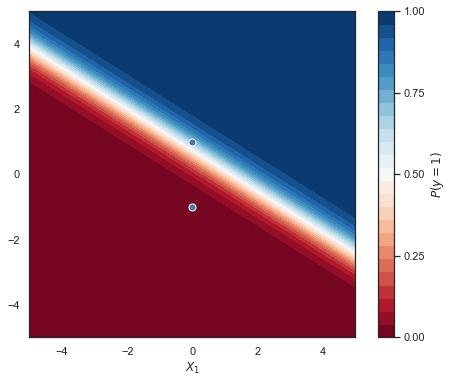

In [245]:
f,ax=plt.subplots(figsize=(8,6))
contour=ax.contourf(xx,yy,probs,25,cmap="RdBu",vmin=0,vmax=1)
ax_c=f.colorbar(contour)
ax_c.set_label("$P(y=1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
#z=np.array(test_Y[test_Y==1])
#d = z[~(np.isnan(z))] 
#dtype(d)
#z = np.array([1,0,1,0,1])
#colors = np.array(["black", "green"])
#colors.shape # answer=2
ax.scatter(test_X[:, 0],test_X[:, 1],s=50,cmap="RdBu",vmin=-.2,vmax=1.2,edgecolor="white",linewidth=1)
ax.set(aspect="equal",xlim=(-5,5),ylim=(-5,5),xlabel="$X_1$",label="$X_2$")
plt.show()

In [248]:
X=data.iloc[0:13,[6,14]].values
y=data.iloc[0:13,30].values
from sklearn.model_selection import train_test_split,cross_val_score
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=4)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)
from sklearn.linear_model import LogisticRegression
LogRrg3=LogisticRegression(C=100,random_state=0)
LogRrg3.fit(train_X,train_Y)
print(LogRrg3.get_params())

{'C': 100, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [249]:
LogRrg3_predict=LogRrg2.predict(test_X)
LogRrg3.score(train_X,train_Y)

0.8888888888888888

In [250]:
LogRrg3.score(test_X,test_Y)

0.75

In [251]:
from sklearn.metrics import confusion_matrix
LogRrg3_confusionMatrix=confusion_matrix(test_Y,LogRrg3_predict)
print(LogRrg3_confusionMatrix)

[[2 1]
 [0 1]]


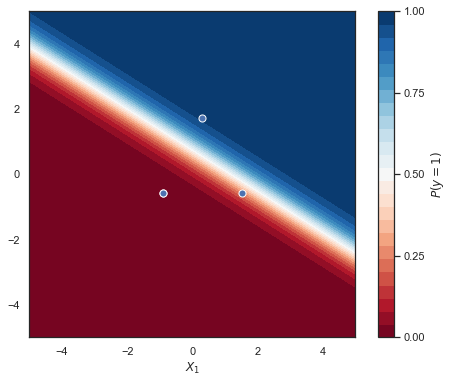

In [252]:
f,ax=plt.subplots(figsize=(8,6))
contour=ax.contourf(xx,yy,probs,25,cmap="RdBu",vmin=0,vmax=1)
ax_c=f.colorbar(contour)
ax_c.set_label("$P(y=1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(test_X[:, 0],test_X[:, 1],s=50,cmap="RdBu",vmin=-.2,vmax=1.2,edgecolor="white",linewidth=1)
ax.set(aspect="equal",xlim=(-5,5),ylim=(-5,5),xlabel="$X_1$",label="$X_2$")
plt.show()